##### Problem Statement: The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather han the ineffective part.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


##### Descriptive Statistics

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [9]:
data = df.drop_duplicates()

In [10]:
data.shape

(1337, 7)

In [11]:
data.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


##### Univariate Analysis

In [12]:
data['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [13]:
data['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [14]:
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:>

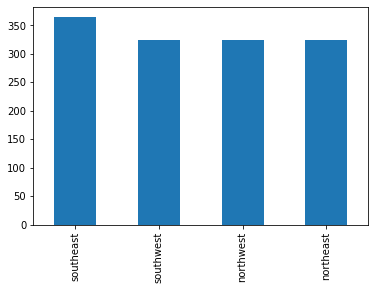

In [15]:
data['region'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='age', ylabel='Count'>

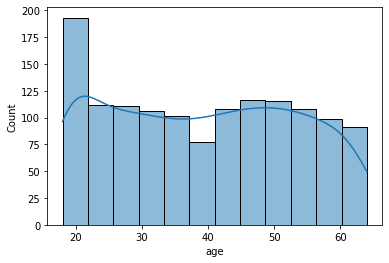

In [16]:
sns.histplot(data['age'], kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

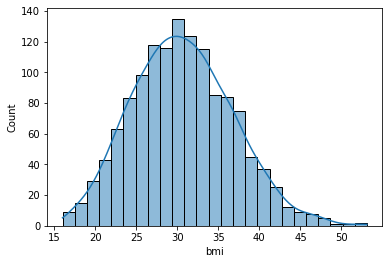

In [17]:
sns.histplot(data['bmi'], kde=True)

<AxesSubplot:xlabel='expenses', ylabel='Count'>

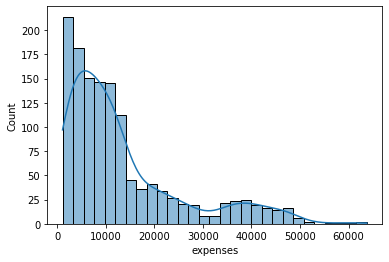

In [18]:
sns.histplot(data['expenses'], kde=True)

<AxesSubplot:xlabel='age'>

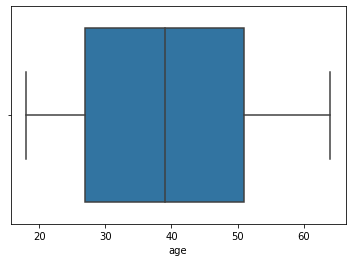

In [19]:
sns.boxplot(data['age'])

<AxesSubplot:xlabel='bmi'>

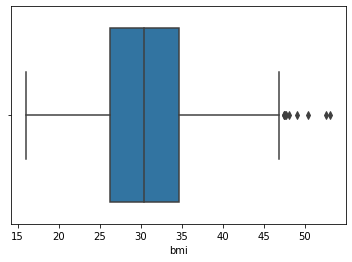

In [20]:
sns.boxplot(data['bmi'])

<AxesSubplot:xlabel='expenses'>

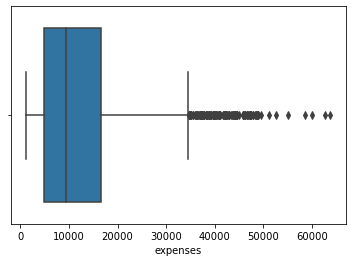

In [21]:
sns.boxplot(data['expenses'])

##### Bivariate Analysis

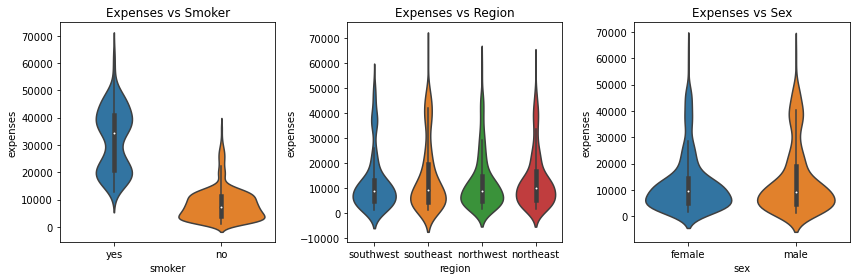

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.violinplot(x="smoker", y="expenses", data=data, ax=ax1)
ax1.set_title("Expenses vs Smoker")
sns.violinplot(x="region", y="expenses", data=data, ax=ax2)
ax2.set_title("Expenses vs Region")
sns.violinplot(x="sex", y="expenses", data=data, ax=ax3)
ax3.set_title("Expenses vs Sex")
plt.tight_layout()
plt.show()
#subplots for bivariate analysis between smoker, region, sex vs expenses

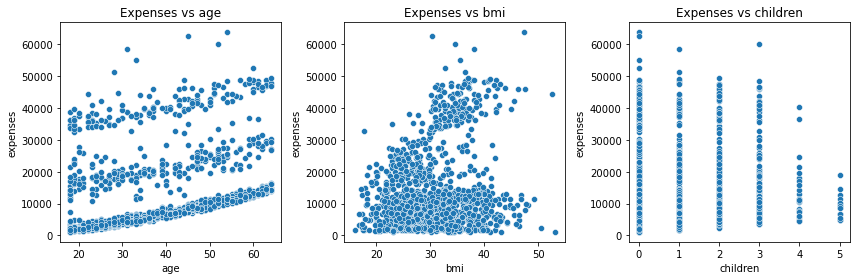

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
sns.scatterplot(x="age", y="expenses", data=data, ax=ax1)
ax1.set_title("Expenses vs age")
sns.scatterplot(x="bmi", y="expenses", data=data, ax=ax2)
ax2.set_title("Expenses vs bmi")
sns.scatterplot(x="children", y="expenses", data=data, ax=ax3)
ax3.set_title("Expenses vs children")
plt.tight_layout()
plt.show()

In [24]:
data.corr()

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


##### Multivariate Analysis

<AxesSubplot:>

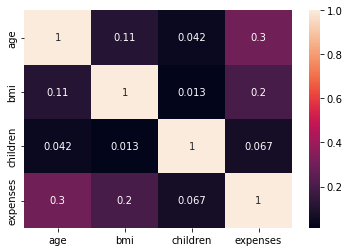

In [26]:
sns.heatmap(data.corr(),annot=True)

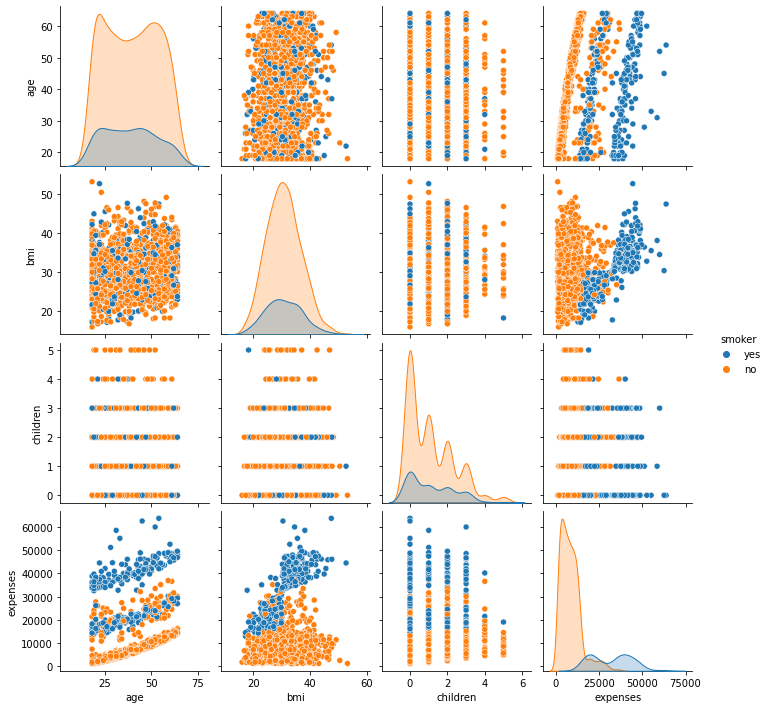

In [29]:
sns.pairplot(data=df,hue='smoker')
plt.show()

In [ ]:
sns.pairplot(data=df,hue='sex')
plt.show()

##### Feature Engineering

In [31]:
df_num = data.select_dtypes(include=['int64','float64'])
df_cat = data.select_dtypes(include='object')

In [32]:
df_num.drop('expenses',axis=1, inplace=True)
df_num.head()

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0


In [33]:
df_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [34]:
df_cat_en = pd.get_dummies(df_cat, drop_first=True)
df_cat_en.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [35]:
df_new = pd.concat([df_num,df_cat_en,data['expenses']],axis=1)

In [36]:
df_new.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,expenses
0,19,27.9,0,0,1,0,0,1,16884.92
1,18,33.8,1,1,0,0,1,0,1725.55
2,28,33.0,3,1,0,0,1,0,4449.46
3,33,22.7,0,1,0,1,0,0,21984.47
4,32,28.9,0,1,0,1,0,0,3866.86


In [37]:
X = df_new.drop('expenses',axis=1)
y = df_new['expenses']

In [39]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state = 2)

##### Model Building

### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.metrics import r2_score

In [43]:
reg = LinearRegression().fit(Xtrain, ytrain)
ypred = reg.predict(Xtest)
r2 = r2_score(ytest, ypred)
print("r2_score:", r2)
# find the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print("Adjusted R-Squared:", adjusted_r2)

r2_score: 0.7148234662099159
Adjusted R-Squared: 0.7060149246256662


### Decision Tree

In [44]:
DT = DecisionTreeRegressor().fit(Xtrain, ytrain)
ypred_DT = DT.predict(Xtest)
r2_DT = r2_score(ytest, ypred_DT)
print("r2_score_DT:", r2_DT)
# finding the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2_DT = 1 - (1-r2_DT)*(n-1)/(n-p-1)
print("Adjusted R-Squared_DT:", adjusted_r2_DT)

r2_score_DT: 0.7615634543761461
Adjusted R-Squared_DT: 0.7541986189900811


### Random Forest

In [45]:
RF = RandomForestRegressor().fit(Xtrain, ytrain)
ypred_RF = RF.predict(Xtest)
r2_RF = r2_score(ytest, ypred_RF)
print("r2_score_RF:", r2_RF)
# find the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2_RF = 1 - (1-r2_RF)*(n-1)/(n-p-1)
print("Adjusted R-Squared_RF:", adjusted_r2_RF)

r2_score_RF: 0.8299424952967434
Adjusted R-Squared_RF: 0.8246897538387277


### Random Forest - GridSearchCV

In [46]:
RF = RandomForestRegressor().fit(Xtrain, ytrain)
ypred_RF = RF.predict(Xtest)
r2_RF = r2_score(ytest, ypred_RF)
print("r2_score_RF:", r2_RF)
# find the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2_RF = 1 - (1-r2_RF)*(n-1)/(n-p-1)
print("Adjusted R-Squared_RF:", adjusted_r2_RF)

r2_score_RF: 0.8327919545125477
Adjusted R-Squared_RF: 0.827627227238804


In [49]:
RF_CV = RandomForestRegressor(max_depth=5,min_samples_split=5,n_estimators= 100).fit(Xtrain, ytrain)
ypred_RF_CV = RF_CV.predict(Xtest)
r2_RF_CV = r2_score(ytest, ypred_RF_CV)
print("r2_score_RF_CV:", r2_RF_CV)
# find the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2_RF_CV = 1 - (1-r2_RF_CV)*(n-1)/(n-p-1)
print("Adjusted R-Squared_RF_CV:", adjusted_r2_RF_CV)

r2_score_RF_CV: 0.8592436545035518
Adjusted R-Squared_RF_CV: 0.8548959681561712


### Model Building using significant features

In [50]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [52]:
lasso = Lasso(alpha=0.1).fit(Xtrain,ytrain)
y_pred_lasso = lasso.predict(Xtest)
r2_lasso = r2_score(ytest,y_pred_lasso)
print("r2_score_lasso:", r2_lasso)
# find the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2_lasso = 1 - (1-r2_lasso)*(n-1)/(n-p-1)
print("Adjusted R-Squared_lasso:", adjusted_r2_lasso)

r2_score_lasso: 0.7148229221159812
Adjusted R-Squared_lasso: 0.7060143637257412


In [53]:
ridge = Ridge(alpha=0.1).fit(Xtrain,ytrain)
y_pred_ridge = ridge.predict(Xtest)
r2_ridge = r2_score(ytest,y_pred_ridge)
print("r2_score_ridge:", r2_ridge)
# find the adjusted R-squared
n = Xtest.shape[0]
p = Xtest.shape[1]
adjusted_r2_ridge = 1 - (1-r2_ridge)*(n-1)/(n-p-1)
print("Adjusted R-Squared_ridge:", adjusted_r2_ridge)

r2_score_ridge: 0.7148424029132272
Adjusted R-Squared_ridge: 0.7060344462464543


### Model Building using significant features

In [55]:
from sklearn.feature_selection import SelectKBest, f_regression
# Selecting the best features using univariate statistics
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(Xtrain, ytrain)
# Train a Linear Regression model on the selected features
reg = LinearRegression().fit(X_new, ytrain)
# Predict the target values for the test set
y_pred_if = reg.predict(selector.transform(Xtest))
# Calculate the mean squared error
r2score = r2_score(ytest, y_pred_if)
print("r2score_if: ", r2score)

r2score_if:  0.7136385806263579


### Predicting new data

In [56]:
np.array(df_new.iloc[20,:8]).reshape(1,-1)

array([[60., 36.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [57]:
RF_CV.predict(np.array(df_new.iloc[25,:8]).reshape(1,-1))

array([15573.68929473])

In [58]:
df_new.iloc[25]

age                    59.00
bmi                    27.70
children                3.00
sex_male                0.00
smoker_yes              0.00
region_northwest        0.00
region_southeast        1.00
region_southwest        0.00
expenses            14001.13
Name: 25, dtype: float64

In [59]:
import pickle

In [60]:
pickle.dump(RF_CV, open('rfmodel.pkl','wb'))

In [61]:
pickled_model=pickle.load(open('rfmodel.pkl','rb'))

In [62]:
# Prediction using the deployed model

pickled_model.predict(np.array(df_new.iloc[25,:8]).reshape(1,-1))

array([15573.68929473])